## Load an test the model from part 1

In [2]:
# For serialization and deserialization of data from/to file
# from sklearn.externals 
import joblib
msmodel = joblib.load('deploy/msmodelAS9.pkl')

In [3]:
# Test reading from the file
my_prediction = msmodel.predict([[3.1,  2]])
my_prediction

array([2], dtype=int64)

### Create flask client

In [4]:
%%writefile mswebapp.py

# Import libraries
import numpy as np

# from sklearn.externals 
import joblib
import pickle
from flask import Flask, request, jsonify, render_template

# create an instance (our app)
app = Flask(__name__)
app = Flask(__name__, template_folder='soft2022spring-DS/More/templates')

msmodel = joblib.load('deploy/msmodel.pkl')

@app.route('/', methods=['GET', 'POST'])

@app.route('/hi/<name>')
def hello(name = None):
    return render_template('start.html', name=name)
# name is parameter in the template: {{name}}

@app.route('/predict')
def predict():
    return render_template('prediction.html')

@app.route('/predicted', methods=['GET', 'POST'])
def predicted():
    if request.method == 'POST':
        x1 = request.form['x1']
        x2 = request.form['x2']
        X = [[x1, x2]]
        predicted = msmodel.predict(X)
          
        return render_template("predicted.html", content=X, prediction=predicted)
    
@app.route('/bye')
def bye():
    return render_template('bye.html')

if __name__ == '__main__':
    app.run(debug=True)

Overwriting mswebapp.py


In [5]:
!python mswebapp.py # run application

^C


### Application running and testing:
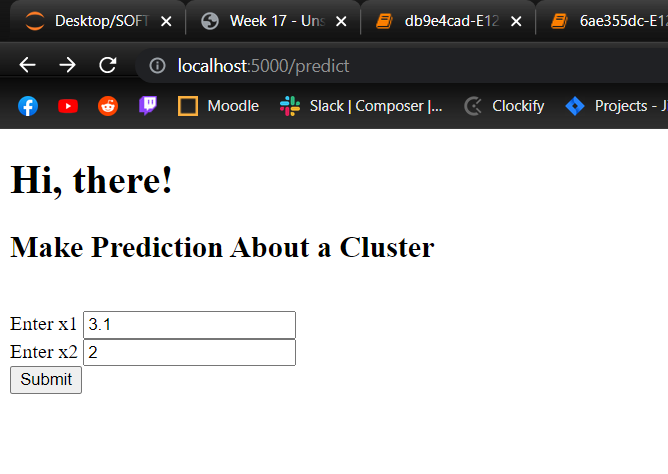

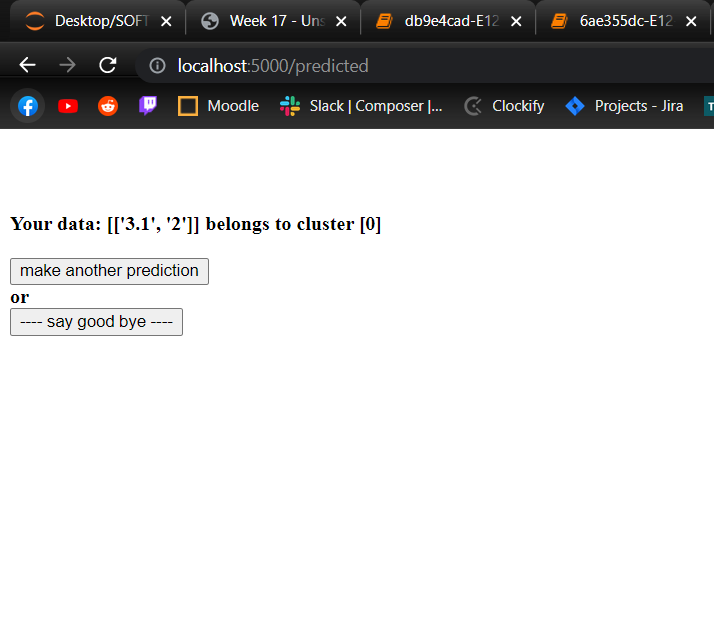

### Task 3

- **Describe the difference between K-means and Mean Shift algorithms**

First off the K-means algorithm is based around distance from each datapoint to the local centroid in a cluster, whilst the Mean Shift algoritms are mostly density based, meaning that it's the distance between each datapoint and their closeness that matters most. Mean Shift automatically discovers the optimal amount of clusters, while with the K-means you have to experiment to find the optimal K value, this is also where the elbow graph and the silhouette score comes in.

- **In which occations would i prefer use the mean shift algorithm?**

In cases where I don't have a huge amount of data to iterate over is when i would consider mean shift, because mean shift is relatively slow. And if I can see that my data has a general shape which can't be seen as somewhat uniform and circular i would probably chooose mean shift. Generally if i visualize my data and I can see density based patterns, i would use mean shift. Also for picture clustering operations.